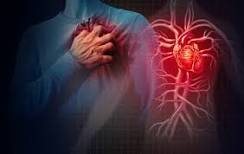



# Heart Disease Prediction 


# Radwa Hussien Hashiesh 
I’m currently learning machine learning & deep learning 
linkedin: https://www.linkedin.com/in/radwa-hashiesh/

# libraries 

In [93]:
pip install CatBoost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,f1_score,precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  RandomizedSearchCV, train_test_split
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
%matplotlib inline

# read dataset


In [95]:
data = pd.read_csv("/content/drive/MyDrive/projects/heart disease/heart.csv")

In [96]:
# to  show first 5 records 
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [97]:
# to show data size 
data.shape

(1025, 14)

In [98]:
# show type of  features 
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# preprocessing Data 


In [99]:
#replace missing value 
data['thalach'] = data['thalach'].fillna(data['thalach'].mean())

In [100]:
'''
#Check duplicate rows in data
duplicate_rows = data[data.duplicated()]
print("Number of duplicate rows :: ", duplicate_rows.shape)
#we have one duplicate row.
#Removing the duplicate row
data1 = data.drop_duplicates()
duplicate_rows = data1[data1.duplicated()]
print("Number of duplicate rows :: ", duplicate_rows.shape)
'''

'\n#Check duplicate rows in data\nduplicate_rows = data[data.duplicated()]\nprint("Number of duplicate rows :: ", duplicate_rows.shape)\n#we have one duplicate row.\n#Removing the duplicate row\ndata1 = data.drop_duplicates()\nduplicate_rows = data1[data1.duplicated()]\nprint("Number of duplicate rows :: ", duplicate_rows.shape)\n'

# show age statistics


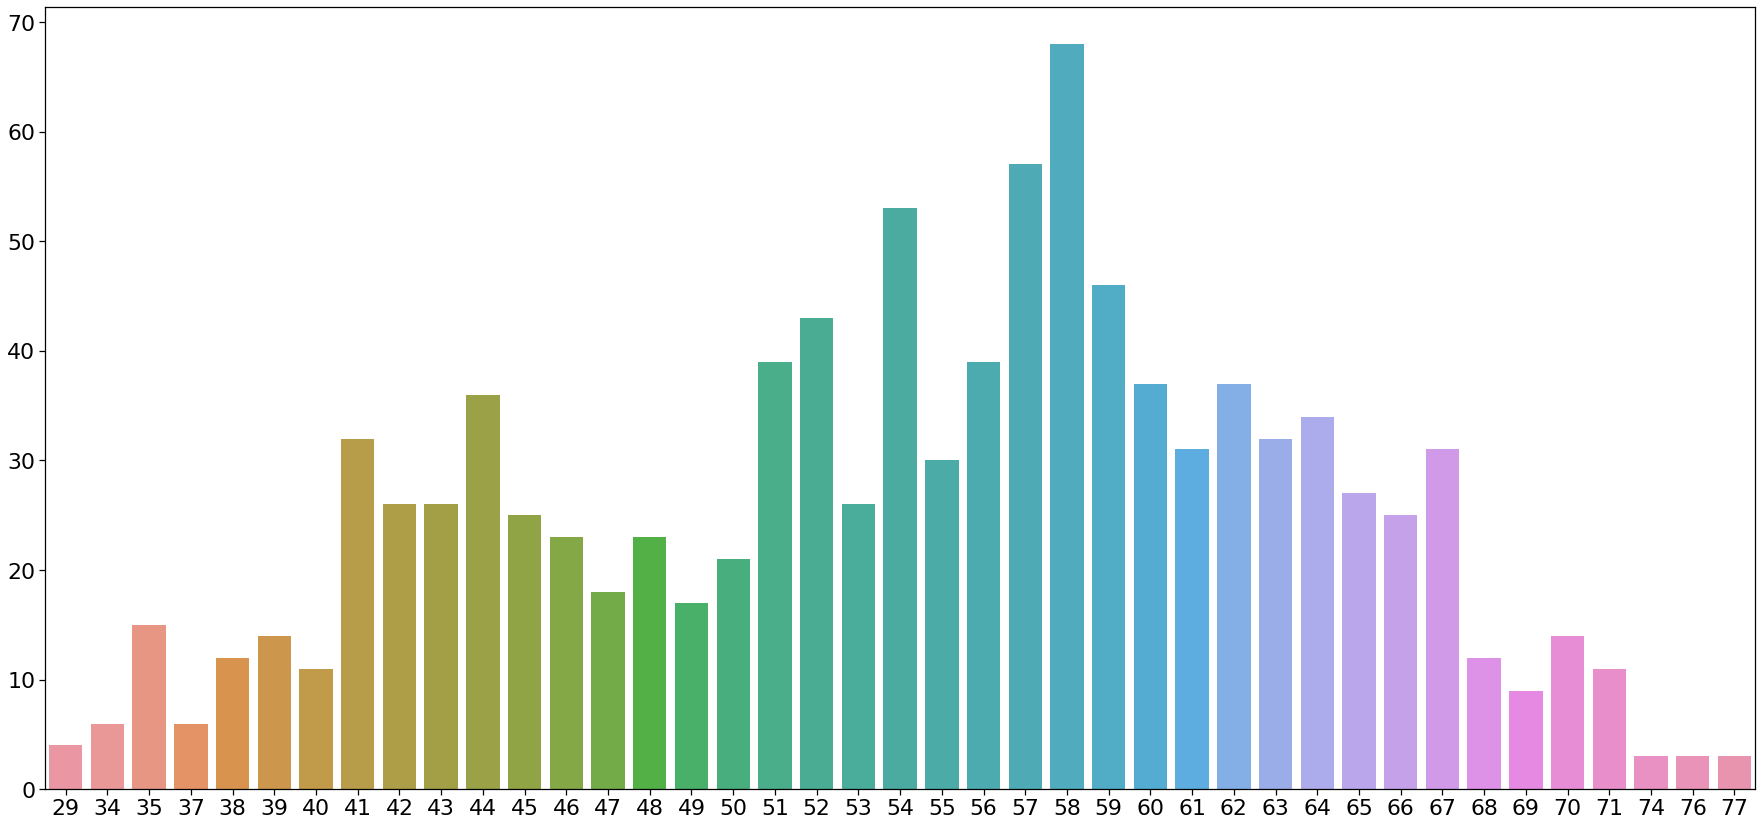

In [101]:

plt.figure(figsize=(25,12))
sns.set_context('notebook',font_scale = 2)
sns.barplot(x=data.age.value_counts()[0:].index,y=data.age.value_counts()[0:].values)
plt.tight_layout()

In [102]:
minAge=min(data.age)
maxAge=max(data.age)
meanAge=data.age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('avarege  Age :',int(meanAge))

Min Age : 29
Max Age : 77
avarege  Age : 54


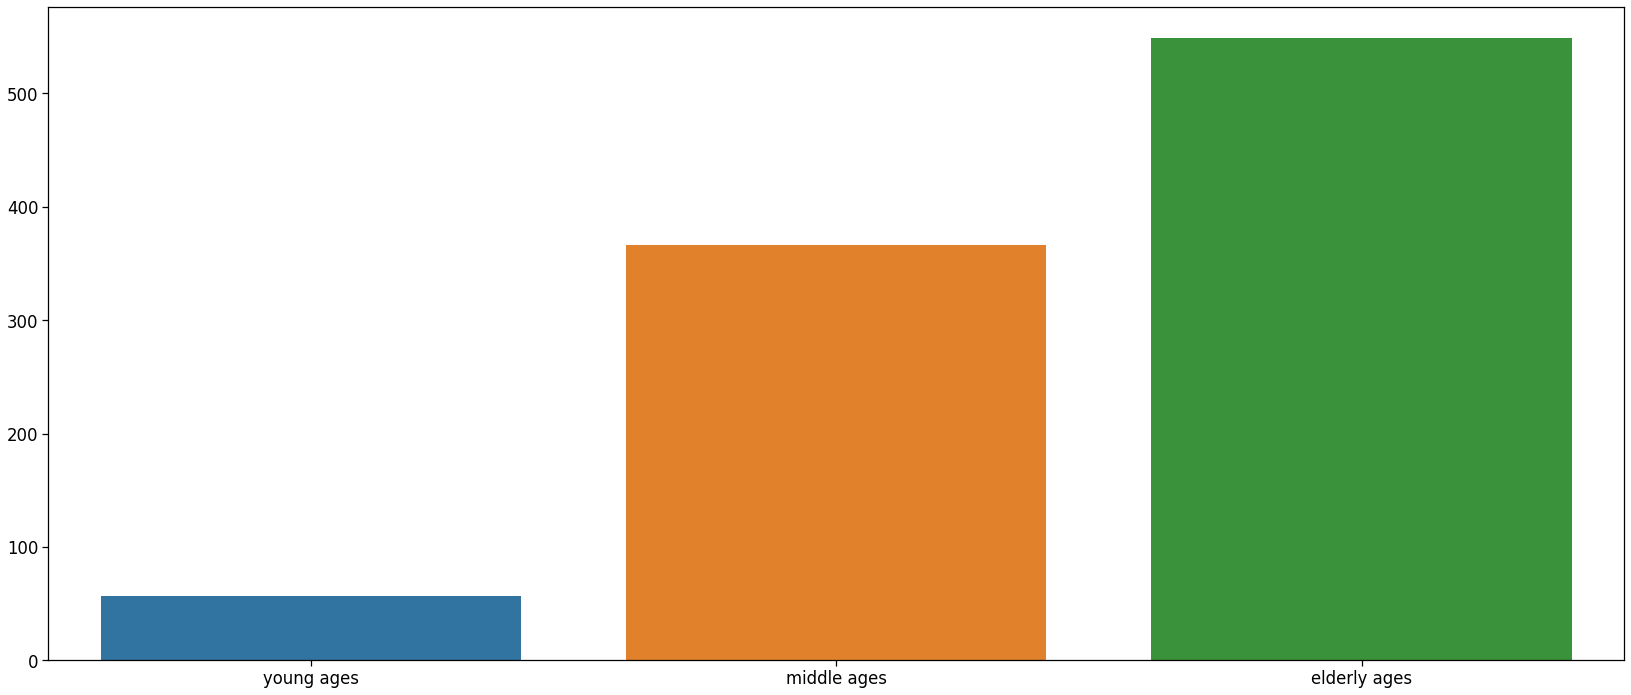

In [103]:
Young = data[(data.age>=29)&(data.age<40)]
Middle = data[(data.age>=40)&(data.age<54)]
Elder = data[(data.age>54)]

plt.figure(figsize=(23,10))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(Young),len(Middle),len(Elder)])
plt.tight_layout()

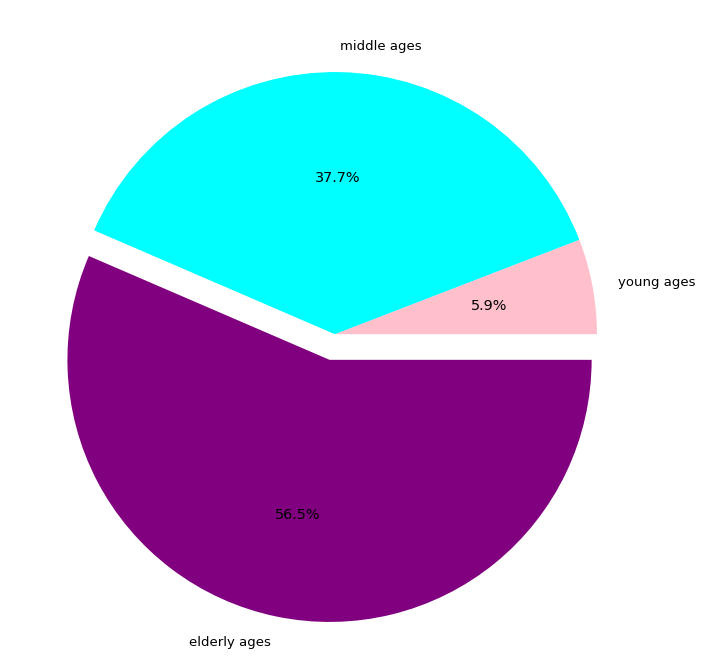

In [104]:
colors = ['pink','cyan','purple']
explode = [0,0,0.1]
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(Young),len(Middle),len(Elder)],labels=['young ages','middle ages','elderly ages'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.tight_layout()

# splitting dataset


In [105]:
#detect data information and target label 
x= data.iloc[:,0:13].values 
y= data['target'].values
#split data 
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=42,stratify=y)
#scale down the data 
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  
print(x_train.shape)
print(x_test.shape)

(820, 13)
(205, 13)


# The KNN Machine Learning Algorithm

In [106]:
# estimate error rate 
error = []
# Calculating error for K values between 1 and 30
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
print("Minimum error:-",min(error),"at K =",error.index(min(error))+1)

Minimum error:- 0.0 at K = 1


Text(0, 0.5, 'Mean Error')

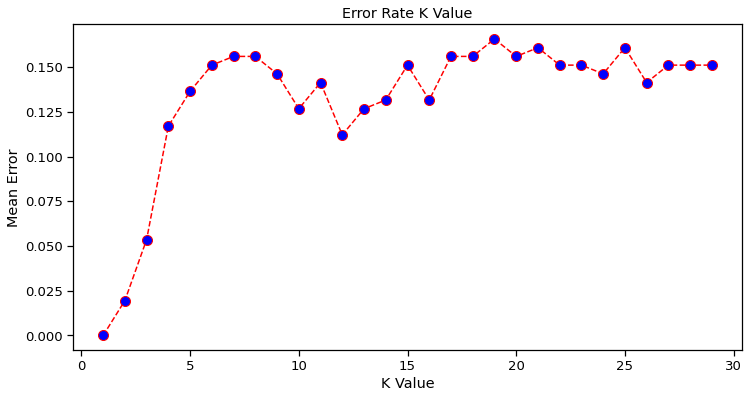

In [107]:
#plotting error rate 
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')


In [108]:
#Apply K-NN Algorithm 
classifier= KNeighborsClassifier(n_neighbors=6)  
classifier.fit(x_train, y_train)
y_pred= classifier.predict(x_test) 

# print prediction results
print(accuracy_score(y_test, y_pred)*100)
print(classification_report(y_test, y_pred))
# print confusion_matrix
cm= confusion_matrix(y_test, y_pred)
print(cm)


84.8780487804878
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       100
           1       0.87      0.83      0.85       105

    accuracy                           0.85       205
   macro avg       0.85      0.85      0.85       205
weighted avg       0.85      0.85      0.85       205

[[87 13]
 [18 87]]


# The SVM Machine Learning Algorithm


In [109]:
#Using SVC method of svm class to use Support Vector Machine Algorithm
from sklearn.svm import SVC
# train the model on train set
model = SVC()
model.fit(x_train, y_train)
# print prediction results
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions)*100)
print(classification_report(y_test, predictions))
cm= confusion_matrix(y_test, y_pred)
print(cm)

92.6829268292683
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       100
           1       0.92      0.94      0.93       105

    accuracy                           0.93       205
   macro avg       0.93      0.93      0.93       205
weighted avg       0.93      0.93      0.93       205

[[87 13]
 [18 87]]


# Use GridsearchCV


In [110]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(x_train, y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.518 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.878 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.866 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.854 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.860 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.829 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.848 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [111]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=100, gamma=0.1)


In [112]:
#re-run predictions and see a classification report on this grid 
grid_predictions = grid.predict(x_test)

# print predict results 
print(accuracy_score(y_test, grid_predictions)*100)
print(classification_report(y_test, grid_predictions))
cm= confusion_matrix(y_test, y_pred)
print(cm)

100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

[[87 13]
 [18 87]]


# Evaluation

In [113]:
#evalution 
input_data = [float(x) for x in input("Enter The Data for Patient: ").split()]
 
input_data_as_numpy_array =np.asanyarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
    print ("The Person Do not Have a Heart Diseasse ")
else:
        print("The Person Has Heart Disease")

Enter The Data for Patient: 62 	1	0 	138 	294 	1 	1 	106 	0 	1.9 	1 	3 	2
[1]
The Person Has Heart Disease
